In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [6]:
#Lectura del csv
data = pd.read_csv("./articulos_ml.csv")
#Visualizacion de las dimenciones
data.shape

(161, 8)

In [7]:
#Imprimimos las primeras 5 lineas
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
#Visualizamos las estadisticas del archivo
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


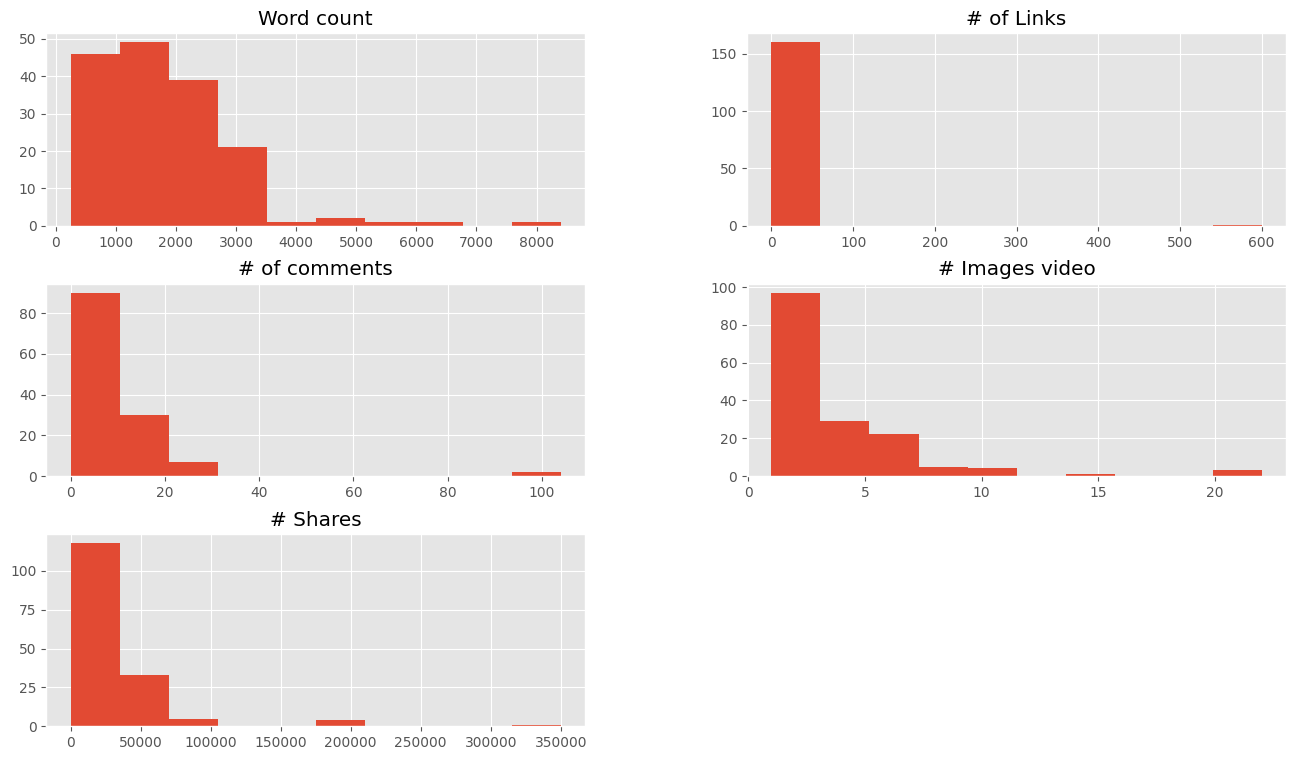

In [10]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

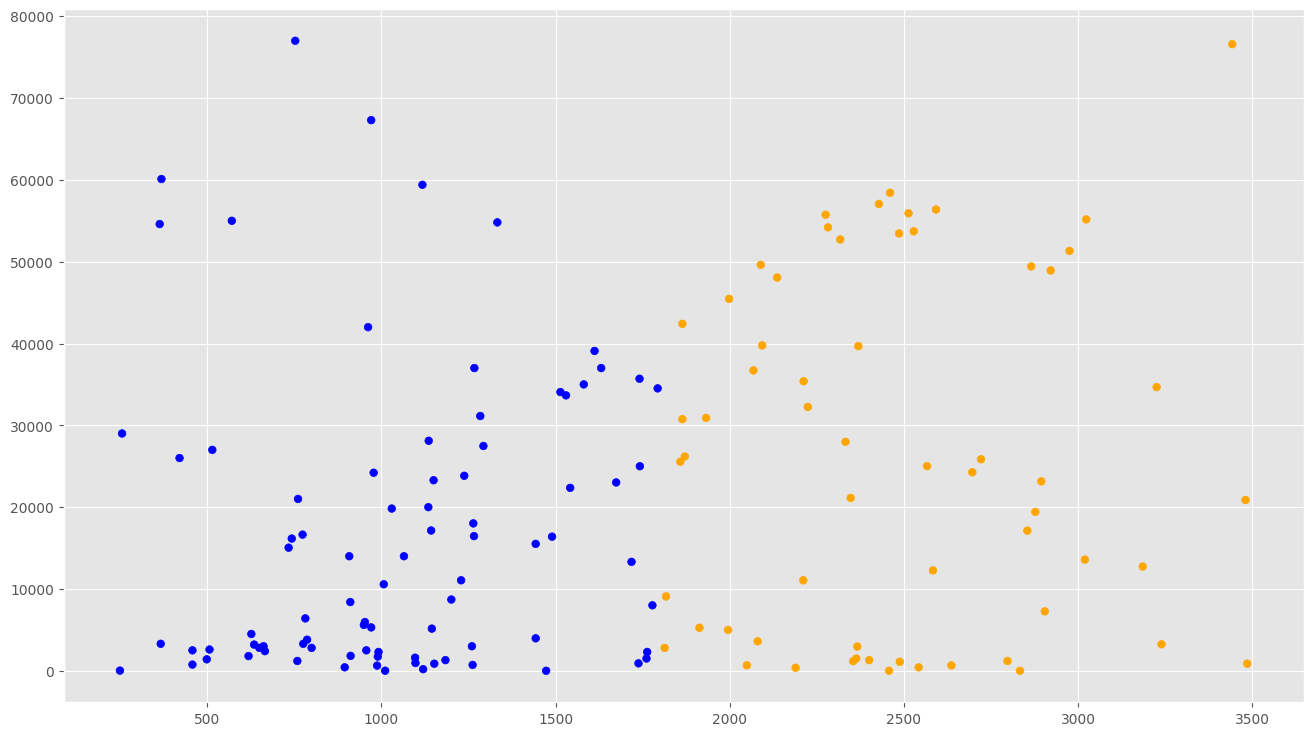

In [11]:
"""
Vamosa RECORTAR los datos en la zona donde se concentran más los puntos
esto es en el eje X: entre 0 y 3.500 y en el eje Y: entre 0 y 80.000
"""

filtered_data = data[(data['Word count']<=3500)&(data['# Shares']<=80000)]
colores=['orange','blue']
tamanios=[30,60]

f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values
#Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c= asignar, s = tamanios[0])
plt.show()

In [15]:
suma = (filtered_data["# of Links"] + filtered_data["# of comments"].fillna(0)+filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"]= filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data["# Shares"].values

In [20]:
#Creamos un nuevo obkjeto de regresion lineal
regr2 = linear_model.LinearRegression()

#entrenamos el modelo con 2 dimenciones, obteniendo 2 coeficientes para graficar el plano
regr2.fit(XY_train, z_train)

#Hacemos las predicciones
z_pred = regr2.predict(XY_train)

#Impresiones
print("Coeficientes: ", regr2.coef_)
print("MSE: %.2f" %mean_squared_error(z_train, z_pred))
print("Variance score: %.2f" %r2_score(z_train, z_pred))

Coeficientes:  [   6.63216324 -483.40753769]
MSE: 352122816.48
Variance score: 0.11


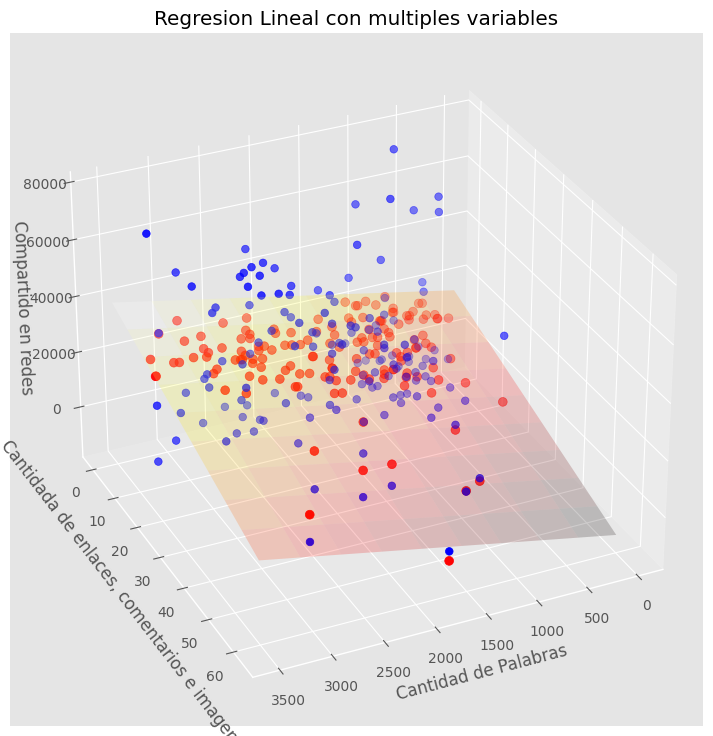

In [26]:
#Graficamos
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Creamos una malla sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#Calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

#Calculamos los correspondientes valores para z
z = (nuevoX + nuevoY + regr2.intercept_)

#Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

#graficamos en azul los puntos en 3d
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c = 'blue', s = 30)

#graficamos en rojo los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c = 'red', s = 40)

#Situamos la camara para visualizar
ax.view_init(elev = 30, azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidada de enlaces, comentarios e imagenes')
ax.set_zlabel('Compartido en redes')
ax.set_title('Regresion Lineal con multiples variables')
plt.show()

In [23]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


C:\Users\maxra\AppData\Local\Temp\ipykernel_20120\3648231557.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_Dosmil))
